## Import Statements

These include our .py files for calling the APIs, cleaning, and aggregating the data

In [1]:
from CallAPIs import *
from Clean_Orig_Data import *
from Create_Aggregate_Datasets import *

from scipy import stats
import numpy as np

Response Status Code = 200
Response Status Code = 200
Response Status Code = 200
Response Status Code = 200


/Users/darian/DC-Crashes/Clean_Orig_Data.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crashes_df.TRAFFIC_CAM[index] = 0
/Users/darian/DC-Crashes/Clean_Orig_Data.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crashes_df.TRAFFIC_CAM[index] = 1
/Users/darian/DC-Crashes/Create_Aggregate_Datasets.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  streets_df.TRAFFIC_CAM[index] += 1
/Users/darian/DC-Crashes/Create_Aggregate_Datas

## Hypothesis #1

What is the probability of getting into an accident in each ward?

H0: the probability of getting into an accident in each ward (1-8) is equal

Ha: the probability of getting into an accident in each of the wards (1-8) is different 

### Some Data Manipulating

In [2]:
pd.options.display.max_columns = None
ward_accidents_df = crashes_df.groupby(["WARD"]).agg('count')

ward_accidents_df = ward_accidents_df.rename(columns={"OBJECTID": "incidents"})
ward_accidents_df = ward_accidents_df.drop(columns=['CRIMEID', 'CCN', 'REPORTDATE', 'ROUTEID', 'MEASURE', 'OFFSET', 'ROADWAYSEGID', 'FROMDATE', 'TODATE', 'MARID', 'ADDRESS', 'LATITUDE', 'LONGITUDE', 'XCOORD', 'YCOORD', 'EVENTID', 'MAR_ADDRESS', 'MAR_SCORE'])

ward_accidents = ward_accidents_df[['incidents']].copy()
ward_accidents = ward_accidents.drop(['Null'])

ward_accidents

,incidents
WARD,
Ward 1,107
Ward 2,189
Ward 3,49
Ward 4,84
Ward 5,175
Ward 6,138
Ward 7,140
Ward 8,113


In [3]:
ward_accidents['incidents'].sum()

995

### Calculate the Chi-Square Statistic 

In [4]:
chi_o = stats.chisquare(f_obs = ward_accidents.incidents, ddof =1)

chi_c = stats.chi2.isf(q=0.05, df=7)

print(f"Chi Observed: {chi_o[0]}, Chi Critical for Alpha = 0.05: {chi_c}")

Chi Observed: 119.89447236180904, Chi Critical for Alpha = 0.05: 14.067140449340167


#### The Chi Observed > Chi Critical, which means there is a significant difference in the number of accidents between wards. 

### Plotting Hypothesis #1

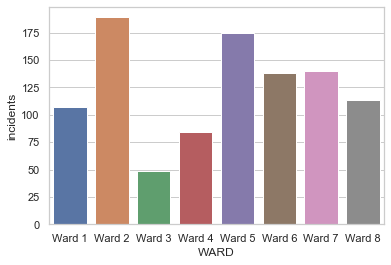

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="whitegrid")

sns.barplot(ward_accidents.index, y='incidents', data=ward_accidents)

## Hypothesis #3

Does the probability of getting injured in an accident change depending on ward?

H0: the probability of getting injured from an accident in any given ward is the same

Ha: the probability of getting injured in an accident is significantly higher in one or more wards 

### Some Data Manipulating

In [8]:
ward_count = crashes_df.groupby(['WARD']).agg('count')

ward_count = ward_count[['OBJECTID']].copy()
ward_count = ward_count.drop(['Null'])

In [9]:
injuries = crashes_df.groupby(['WARD']).agg('sum')
injuries.head()

,OBJECTID,CRIMEID,MEASURE,OFFSET,STREETSEGID,ROADWAYSEGID,MARID,LATITUDE,LONGITUDE,XCOORD,YCOORD,MAR_SCORE,MAJORINJURIES_BICYCLIST,MINORINJURIES_BICYCLIST,UNKNOWNINJURIES_BICYCLIST,FATAL_BICYCLIST,MAJORINJURIES_DRIVER,MINORINJURIES_DRIVER,UNKNOWNINJURIES_DRIVER,FATAL_DRIVER,MAJORINJURIES_PEDESTRIAN,MINORINJURIES_PEDESTRIAN,UNKNOWNINJURIES_PEDESTRIAN,FATAL_PEDESTRIAN,TOTAL_VEHICLES,TOTAL_BICYCLES,TOTAL_PEDESTRIANS,PEDESTRIANSIMPAIRED,BICYCLISTSIMPAIRED,DRIVERSIMPAIRED,TOTAL_TAXIS,TOTAL_GOVERNMENT,SPEEDING_INVOLVED,OFFINTERSECTION,MPDLATITUDE,MPDLONGITUDE,MPDGEOX,MPDGEOY,FATALPASSENGER,MAJORINJURIESPASSENGER,MINORINJURIESPASSENGER,UNKNOWNINJURIESPASSENGER
WARD,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Null,610722997,125297639,2832.95,0.01,12532.0,14329.0,4523693,194.570301,-385.088937,1.992290e+06,6.923331e+05,500.000000,0,0,0,0,1,0,0,0,0,0,0,0,10,0,0,0,0,0,0,2,0,0.09,-27.000000,-27.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
Ward 1,13059125405,2896681015,193369.94,1242.25,343335.0,1101267.0,33388401,4164.872810,-8242.398062,4.250536e+07,1.493450e+07,18973.000000,1,1,2,0,3,22,8,0,1,11,0,0,202,3,12,1,0,4,8,11,1,1921.87,3140.700499,-6483.648579,3.058360e+07,1.074886e+07,0.0,0.0,0.0,0.0
Ward 2,23068211294,5094362238,222276.98,2008.61,690433.0,1900821.0,60134537,7352.505881,-14560.134205,7.498123e+07,2.592026e+07,34245.949997,5,5,0,0,3,19,10,1,3,4,0,0,367,7,7,0,0,2,37,19,0,4313.81,6008.633565,-12193.867975,4.919667e+07,1.700857e+07,0.0,0.0,3.0,0.0
Ward 3,5981427948,1295829887,74902.60,537.72,161483.0,747487.0,15197709,1907.923673,-3776.868000,1.926463e+07,6.910981e+06,8143.300003,0,0,1,0,5,6,1,0,0,2,0,0,93,0,1,0,0,0,6,7,0,1758.21,1257.918115,-2570.664579,9.431522e+06,3.382167e+06,0.0,0.0,0.0,0.0
Ward 4,10252702780,2266989833,214207.40,921.48,181459.0,972812.0,22749708,3272.479607,-6469.903075,3.343511e+07,1.204162e+07,15261.000000,0,0,0,0,3,18,3,0,0,3,0,0,165,0,4,0,0,4,2,7,1,1365.98,2718.059380,-5400.539845,2.270280e+07,8.168717e+06,0.0,0.0,1.0,3.0


In [10]:
injuries['bike_total_injuries'] = injuries['MAJORINJURIES_BICYCLIST'] + injuries['MINORINJURIES_BICYCLIST'] + injuries['UNKNOWNINJURIES_BICYCLIST']
                                           
injuries['driver_total_injuries'] = injuries['MAJORINJURIES_DRIVER'] + injuries['MINORINJURIES_DRIVER'] + injuries['UNKNOWNINJURIES_DRIVER']

injuries['pedestrian_total_injuries'] = injuries['MAJORINJURIES_PEDESTRIAN'] + injuries['MINORINJURIES_PEDESTRIAN'] + injuries['UNKNOWNINJURIES_PEDESTRIAN']

injuries = injuries[['pedestrian_total_injuries','bike_total_injuries','driver_total_injuries']]                                                                          

In [11]:
ward_injuries = pd.concat([ward_count, injuries], axis=1)
ward_injuries = ward_injuries.drop(['Null'])
ward_injuries = ward_injuries.rename(columns={"OBJECTID": "incidents"})

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [12]:
ward_injuries['total_injuries'] = ward_injuries['pedestrian_total_injuries'] + ward_injuries['bike_total_injuries'] + ward_injuries['driver_total_injuries']
ward_injuries = ward_injuries.drop(['incidents','pedestrian_total_injuries','bike_total_injuries','driver_total_injuries'], axis=1)

ward_injuries

,total_injuries
Ward 1,49
Ward 2,49
Ward 3,15
Ward 4,27
Ward 5,67
Ward 6,53
Ward 7,73
Ward 8,45


### Calculating the Chi-Square Statistic

In [17]:
chi_o2 = stats.chisquare(f_obs = ward_injuries.total_injuries, ddof =1)

chi_c2 = stats.chi2.isf(q=0.05, df=7)

print(f"Chi Observed: {chi_o2[0]}, Chi Critical for Alpha = 0.05: {chi_c2}")

Chi Observed: 53.91534391534391, Chi Critical for Alpha = 0.05: 14.067140449340167


#### The Chi Observed > Chi Critical, which means there is a significant difference in the number of injuries from accidents between wards. 

### Plotting Hypothesis #3

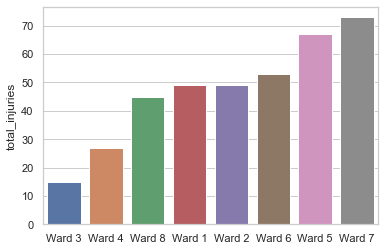

In [48]:
sns.barplot(ward_injuries.index, y='total_injuries', data=ward_injuries)

## Hypothesis #?

Is the number of incidents for each ward significantly different than the average for all 8 wards?

H0:

Ha:

In [ ]:
ward_accidents['ward_average'] = ward_accidents['incidents'].mean()
ward_accidents

# what statistical test would I do to compare each ward's accident levels to the average 